In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import levene
from statsmodels.stats.weightstats import ztest

enem_sp = pd.read_csv('/Users/paull/OneDrive/Área de Trabalho/LEONARDO/python/jupyter/enem_2019_tratado.csv',
                     sep = ',', encoding = 'iso-8859-1')

# Teste Z para duas amostras independentes

Número de amostras maior ou igual a 30
Necessita conhecimento do desvio padrão

In [3]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo: Analisar a diferença entre as médias de mulheres e homens para a nota de um dos componentes do colégio x

In [4]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [5]:
colegiox.shape

(41, 24)

In [7]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']
colegiox_mulher.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,1,branca,1,2,pública,35017632.0,...,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,537.9,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [8]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']
colegiox_homem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,705.3,Inglês,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


In [9]:
# 1) analise da classificação das variáveis
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

In [10]:
# 2) Analise de valores missing
colegiox.isnull()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17070,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17072,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


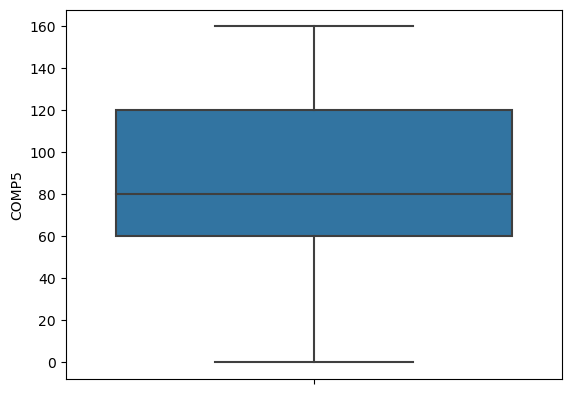

In [13]:
# 3) Análise de outliers

grafico = sns.boxplot( data = colegiox_mulher, y = "COMP5")

grafico2 = sns.boxplot( data = colegiox_homem, y = "COMP5")

In [ ]:
# 4) Análise de normalidade 

Nível de sgnificancia de 0,05 ou 5% (mais utilizado)
quando p > 0,05 (dist norm)


In [16]:
# teste de Shapiro-Wilk
stats.shapiro(colegiox_mulher.COMP5)

ShapiroResult(statistic=0.9521203637123108, pvalue=0.2238943725824356)

In [17]:
# teste de Shapiro-Wilk
stats.shapiro(colegiox_homem.COMP5)

ShapiroResult(statistic=0.942307710647583, pvalue=0.48747217655181885)

<AxesSubplot:xlabel='COMP5', ylabel='Probability'>

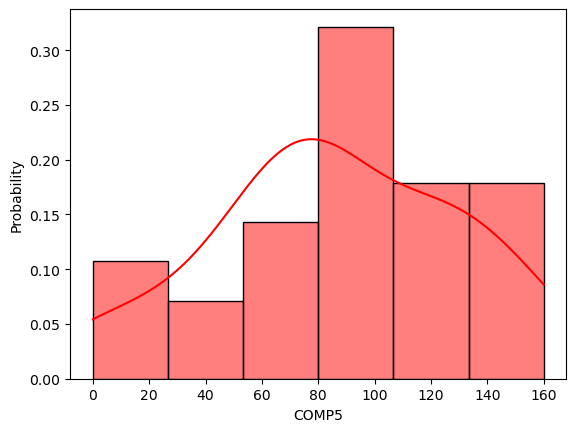

In [19]:
sns.histplot(colegiox_mulher, x = 'COMP5', bins = 6, color ="red", kde = True, stat = "probability")

<AxesSubplot:xlabel='COMP5', ylabel='Probability'>

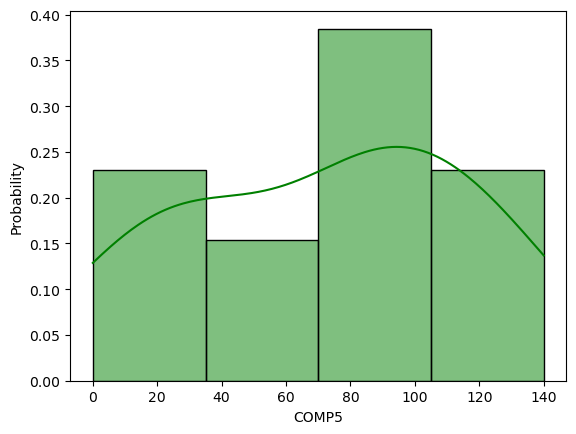

In [20]:
sns.histplot(colegiox_homem, x = 'COMP5', bins = 4, color ="green", kde = True, stat = "probability")

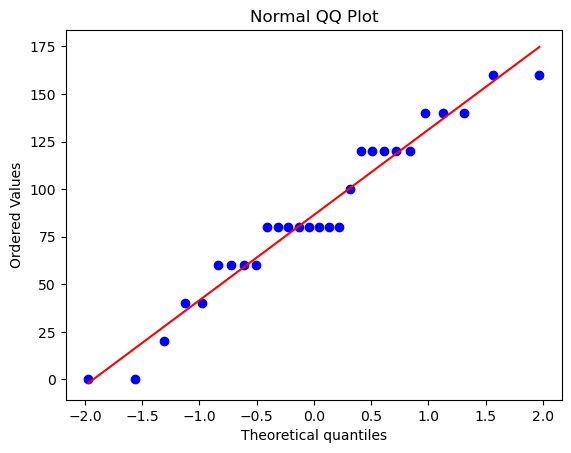

In [23]:
stats.probplot(colegiox_mulher['COMP5'], dist = "norm", plot = plt)
plt.title("Normal QQ Plot")
plt.show()

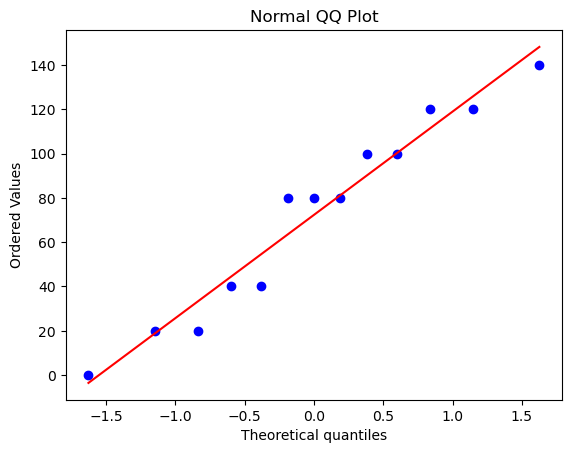

In [25]:
stats.probplot(colegiox_homem['COMP5'], dist = "norm", plot = plt)
plt.title("Normal QQ Plot")
plt.show()

In [ ]:
# 5) Homogeneidade das variâncias (homocedasticidade)

variabilidade dos erros constante
Ho = variâncias honogêneas : p > 0.05
Ha = variâncias não honogêneas : p <= 0.05

In [26]:
# teste de Levene
stat, p = levene(colegiox_mulher.COMP5, colegiox_homem.COMP5, center='mean')
print('Estatística de teste:{}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste:0.07
p-valor: 0.7899416696


#  TESTE Z  para duas amostras independentes

#### comparação das médias das notas do componente 5 da redação entre homens e mulheres do colégioX.

##### Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : P > 0.05
##### Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : P<= 0.05

In [29]:
stat, p = ztest(colegiox_mulher.COMP5, colegiox_homem.COMP5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor:{}'.format(p))

Estatística de teste: 0.96
p-valor:0.3394918950042334


In [31]:
colegiox_mulher.COMP5.describe()


count     28.000000
mean      86.428571
std       43.903453
min        0.000000
25%       60.000000
50%       80.000000
75%      120.000000
max      160.000000
Name: COMP5, dtype: float64

In [32]:
colegiox_homem.COMP5.describe()

count     13.000000
mean      72.307692
std       44.376016
min        0.000000
25%       40.000000
50%       80.000000
75%      100.000000
max      140.000000
Name: COMP5, dtype: float64

std: desvio padrão, dispersão dos valores
com a alta dispersão de valores as notas das mulheres não são necessariamente diferentes


### Interpretação:

##### Teste estatístico: 0,96
##### p_valor = 0,339

#### Conclusão: Estatísticamente, com intervalo de confiança de 95%, não se pode concluir que a média do componente 5 da redação do colegiox seja diferente entre homens e mulheres